# Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
## This just checks the version of geopandas
gpd.__version__

'0.8.1'

## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

In [3]:
gpd.read_file?

Signature: gpd.read_file(filename, bbox=None, mask=None, rows=None, **kwargs)
Docstring:
Returns a GeoDataFrame from a file or URL.

.. versionadded:: 0.7.0 mask, rows

Parameters
----------
filename : str, path object or file-like object
    Either the absolute or relative path to the file or URL to
    be opened, or any object with a read() method (such as an open file
    or StringIO)
bbox : tuple | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter features by given bounding box, GeoSeries, GeoDataFrame or a
    shapely geometry. CRS mis-matches are resolved if given a GeoSeries
    or GeoDataFrame. Cannot be used with mask.
mask : dict | GeoDataFrame or GeoSeries | shapely Geometry, default None
    Filter for features that intersect with the given dict-like geojson
    geometry, GeoSeries, GeoDataFrame or shapely geometry.
    CRS mis-matches are resolved if given a GeoSeries or GeoDataFrame.
    Cannot be used with bbox.
rows : int or slice, default None
    L

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [4]:
# Read shapefile
ph = gpd.read_file('gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(3)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."


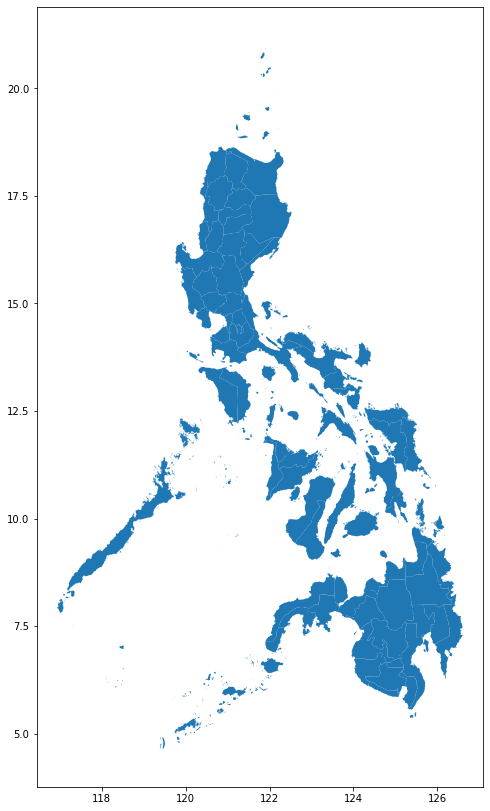

In [5]:
ph.plot(figsize=(8,15))

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [6]:
fname = 'philippines.geojson'

# Check if the file was downloaded successfully
if os.path.exists(fname):
    print('File exists')
else:
    print('File does not exist')

File exists


In [7]:
# Read GeoJSON file
healthsites = gpd.read_file(fname, driver='GeoJSON')
healthsites.head()

,source_url,what3words,upstream,name,completeness,uuid,date_modified,source,version,type,physical-address,phone,email,url,defining-hours,geometry
0,http://www.openstreetmap.org/node/2694351354,chat.pints.mankind,openstreetmap¶n2694351354,20-1 Barangay Health Station,35.29%,e32de8829d524d60b40a55a2029b765f,2015-11-17T09:43:57.838001+00:00,OpenStreetMap,2,clinic,None,None,None,None,None,POINT (121.13735 14.56600)
1,http://www.openstreetmap.org/node/2141277725,shadow.vipers.modest,openstreetmap¶n2141277725,24hr Birthing Center,35.29%,116f9d20caa946ea969796092d79b0dc,2015-11-17T09:43:57.838001+00:00,OpenStreetMap,2,clinic,None,None,None,None,None,POINT (123.94312 10.33793)
2,http://www.openstreetmap.org/node/4020825463,caravan.flint.evicted,OpenStreetMap¶n4020825463,4m ultrasound,29.41%,6cbffaf7de0b49bd81eb99b58d291206,2016-02-26T15:58:36+00:00,OpenStreetMap,2,clinic,None,None,None,None,None,POINT (125.97913 8.50781)
3,http://www.openstreetmap.org/way/317862375,wildest.progress.chirped,openstreetmap¶w317862375,7thDayAdventistSanitariumHospital,35.29%,3225787941ba40e7ab8c81514ec1a16f,2015-12-11T10:51:22.924000+00:00,OpenStreetMap,2,hospital,None,None,None,None,None,POINT (124.56608 12.06808)
4,http://www.openstreetmap.org/way/266959244,chug.redhead.quickness,openstreetmap¶w266959244,81752,35.29%,ceaf253f77044fd28035a65bdb91ed14,2015-12-11T10:51:22.924000+00:00,OpenStreetMap,2,clinic,None,None,None,None,None,POINT (120.23383 14.87967)


### CSV

Sometimes we have data in a normal CSV file but it also contains geographic information in different columns. A common example would be having the longitude and latitude in two separate columns. Since we are aware that there is value in having the data as a geometric point, there is a way to convert two columns to a `Point` using `shapely`.

CitiBike Historical Trip Data: https://s3.amazonaws.com/tripdata/index.html

We should already have the a CitiBike trip data file from the previous lab.

In [8]:
# Read in the data using pandas

citibike = pd.read_csv('201901-citibike-tripdata.csv')
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


In [9]:
citibike.shape

(967287, 15)

Since the data is huge, this might take a long time to run because geometric operations is quite expensive (computationally) on a local machine. 

In [10]:
stations = citibike[['end station name', 'end station longitude', 'end station latitude']]

In [11]:
stations.drop_duplicates(inplace=True)
stations.shape

<ipython-input-11-2a765e21ed06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations.drop_duplicates(inplace=True)


(787, 3)

In [12]:
# Create the geometry
geometry = [Point(xy) for xy in zip(stations['end station longitude'], 
                                    stations['end station latitude'])]

In [14]:
# Set the crs
crs = "EPSG:4326"

# Create the GeoDataFrame from the DataFrame
citi_gdf = gpd.GeoDataFrame(stations, crs=crs, geometry=geometry)
citi_gdf.head()

,end station name,end station longitude,end station latitude,geometry
0,W 89 St & Columbus Ave,-73.970416,40.788221,POINT (-73.97042 40.78822)
1,E 39 St & 2 Ave,-73.973442,40.747804,POINT (-73.97344 40.74780)
2,E 77 St & 3 Ave,-73.958562,40.773142,POINT (-73.95856 40.77314)
3,W 15 St & 6 Ave,-73.996430,40.738046,POINT (-73.99643 40.73805)
4,E 20 St & Park Ave,-73.987520,40.738274,POINT (-73.98752 40.73827)


In [16]:
type(citi_gdf)

geopandas.geodataframe.GeoDataFrame

In [17]:
type(stations)

pandas.core.frame.DataFrame

## Basic Visualization

With `matplotlib` and `descartes` built into `geopandas`, we can easily plot a `GeoDataFrame` by simply calling the `plot` function. Most of the parameters that come with the `plot` function from `pandas` can also be used here.

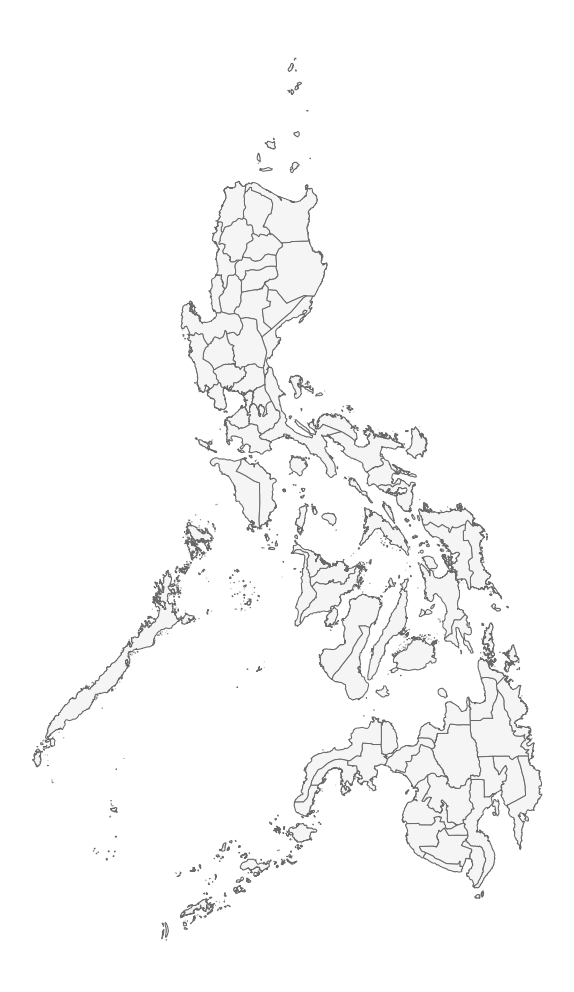

In [18]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off');

In [19]:
ph.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Projections
Different datasets would have different projections to minimize the distortion depending on where they are on the globe. When doing spatial analysis, it is normal to be working with multiple datasets in different formats and different projections depending on how they were collected or how they should be presented.

Let us take the example of the New York City Taxi Zones and CitiBike stations. We already have the CitiBike stations from the example above.

- NYC Taxi Zones: https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip

In [20]:
taxi = gpd.read_file('taxi_zones/taxi_zones.shp')
taxi.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

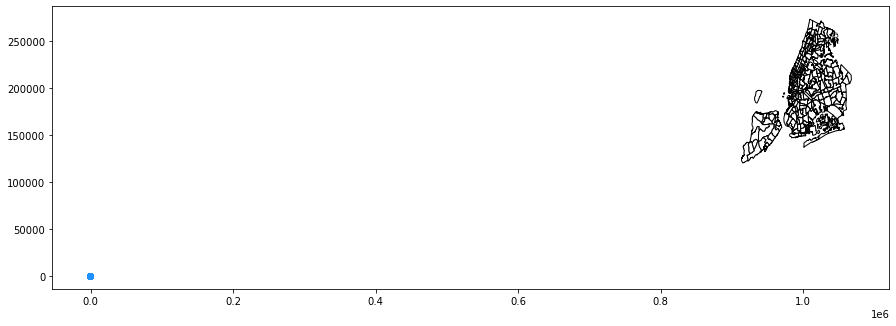

In [24]:
ax = taxi.plot(figsize=(15, 15), color='white', edgecolor='k')
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.3);

In [22]:
print('Taxizones CRS', taxi.crs)
print('Citi Bike CRS', citi_gdf.crs)

Taxizones CRS epsg:2263
Citi Bike CRS EPSG:4326


In [25]:
citi_gdf = citi_gdf.to_crs("EPSG:2263")

# Another is to simply pass the code for the epsg through the epsg parameter
# citi_gdf = citi_gdf.to_crs(epsg=2263)

In [26]:
print('Taxizones CRS', taxi.crs)
print('Citi Bike CRS', citi_gdf.crs)

Taxizones CRS epsg:2263
Citi Bike CRS EPSG:2263


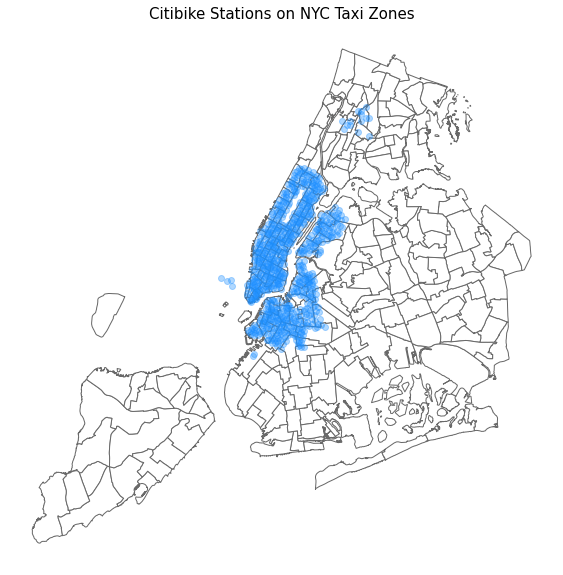

In [27]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

taxi.plot(ax=ax, color='white', edgecolor='dimgray')
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.35)

ax.set_title('Citibike Stations on NYC Taxi Zones', fontsize=15)
ax.axis('off');

## Merging Data

There are two ways we can merge data in GeoPandas:
1. Attribute join
2. Spatial join

### Attribute join
This is when you merge two datasets based on a common column. Similar to how you would merge two regular `pandas DataFrame`s. 

**IMPORTANT**

When merging a `GeoDataFrame` and a `DataFrame`, it is important that the **left** `DataFrame` is the one with the geospatial data. Otherwise, the `GeoDataFrame` will turn into a regular `DataFrame` and lose all the features and functions of a `GeoDataFrame`.

**Data**
- World Population Data (World Bank): http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
- Countries shapefile: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/

*Note: The countries shapefile is also available within geopandas through `gpd.datasets.get_path('naturalearth_lowres')` but this data seems to be outdated as it only has 177 rows.*

In [28]:
# Read in the shapefile from the download
world = gpd.read_file('ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [29]:
world.shape

(255, 95)

In [30]:
population = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1308146/API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv',
                         skiprows=3)
population.dropna(axis=1, how='all', inplace=True)
print(len(population))
population.head(3)

264


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0


In [31]:
country_shapes = world[['ADMIN', 'ADM0_A3', 'geometry']]
type(country_shapes)

geopandas.geodataframe.GeoDataFrame

In [32]:
country_shapes.head()

,ADMIN,ADM0_A3,geometry
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


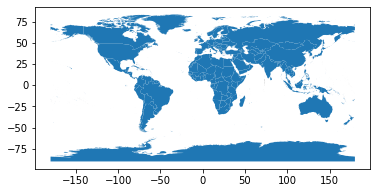

In [33]:
country_shapes.plot()

In [34]:
# Merge the two dataframes
# Here I used LEFT JOIN first to be able to get all the country shapes
country_pop = country_shapes.merge(population, left_on='ADM0_A3', right_on='Country Code', how='left')
country_pop.head()

,ADMIN,ADM0_A3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Indonesia,IDN,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",Indonesia,IDN,"Population, total",SP.POP.TOTL,87751068.0,90098394.0,92518377.0,...,241834215.0,245116206.0,248452413.0,251806402.0,255129004.0,258383256.0,261554226.0,264645886.0,267663435.0,270625568.0
1,Malaysia,MYS,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",Malaysia,MYS,"Population, total",SP.POP.TOTL,8156347.0,8417824.0,8692342.0,...,28208035.0,28650955.0,29068159.0,29468872.0,29866559.0,30270962.0,30684804.0,31105028.0,31528585.0,31949777.0
2,Chile,CHL,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",Chile,CHL,"Population, total",SP.POP.TOTL,8132990.0,8303811.0,8476897.0,...,17062536.0,17233576.0,17400347.0,17571507.0,17758959.0,17969353.0,18209068.0,18470439.0,18729160.0,18952038.0
3,Bolivia,BOL,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",Bolivia,BOL,"Population, total",SP.POP.TOTL,3656955.0,3728964.0,3802990.0,...,10048590.0,10212954.0,10377676.0,10542376.0,10706517.0,10869730.0,11031813.0,11192854.0,11353142.0,11513100.0
4,Peru,PER,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",Peru,PER,"Population, total",SP.POP.TOTL,10155015.0,10446620.0,10749466.0,...,29027674.0,29264318.0,29506788.0,29773987.0,30090359.0,30470734.0,30926032.0,31444297.0,31989256.0,32510453.0


In [35]:
# However, looking at the tail of the dataset, we can see that there are certain areas that have no population data
country_pop.tail()

,ADMIN,ADM0_A3,geometry,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
250,Macao S.A.R,MAC,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...","Macao SAR, China",MAC,"Population, total",SP.POP.TOTL,167791.0,170462.0,176183.0,...,538219.0,550832.0,564039.0,577372.0,590208.0,602085.0,612836.0,622585.0,631636.0,640445.0
251,Ashmore and Cartier Islands,ATC,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,Bajo Nuevo Bank (Petrel Is.),BJN,"POLYGON ((-79.98929 15.79495, -79.98782 15.796...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,Serranilla Bank,SER,"POLYGON ((-78.63707 15.86209, -78.64041 15.864...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Scarborough Reef,SCR,"POLYGON ((117.75389 15.15437, 117.75569 15.151...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


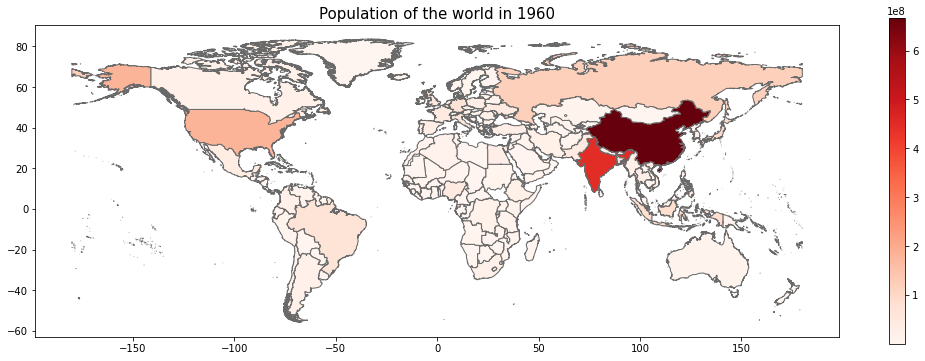

In [36]:
ax = country_pop.plot(figsize=(18,6), column='1960', cmap=plt.cm.Reds, legend=True, edgecolor='dimgray')
ax.set_title('Population of the world in 1960', fontsize=15);

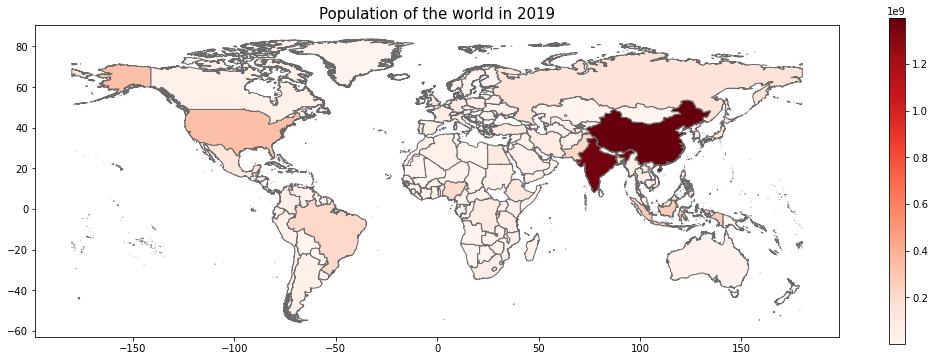

In [37]:
ax = country_pop.plot(figsize=(18,6), column='2019', cmap=plt.cm.Reds, legend=True, edgecolor='dimgray')
ax.set_title('Population of the world in 2019', fontsize=15);

In [38]:
# Let's drop the rows with NaN's so we can actually see the population distribution arcoss the world
country_pop.dropna(axis=0, how='any', inplace=True)
country_pop.shape

(209, 67)

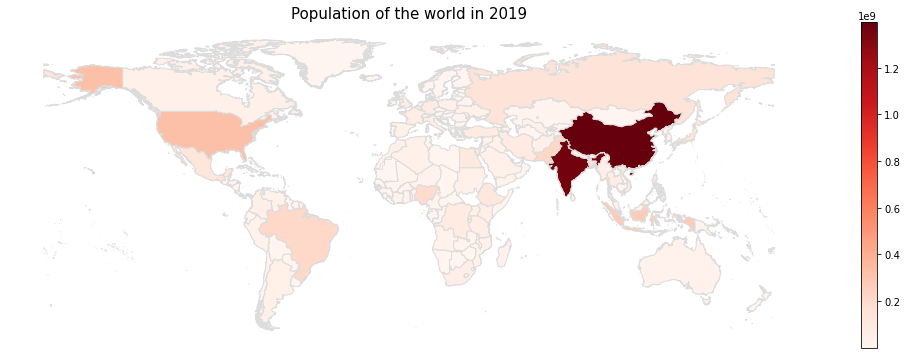

In [40]:
ax = country_pop.plot(figsize=(18,6), column='2019', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 2019', fontsize=15)
ax.axis('off');

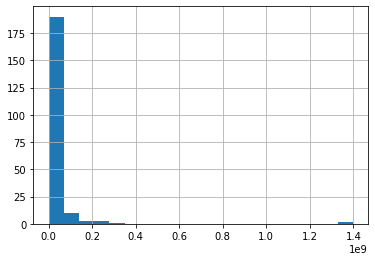

In [42]:
country_pop['2019'].hist(bins=20)

### Spatial Join
Spatial join is already built into `geopandas` through the function `gpd.sjoin()`. The spatial operation is passed through the parameter `op` and the join can also be specified like a merge in `pandas` through the parameter `how`.

The main thing to remember when doing a spatial join is the **order** of the `GeoDataFrame` parameters you pass matters. When you do an `sjoin`, only the geometry of the left `GeoDataFrame` is left in the merged data. So make sure you carefully consider what data you want left behind and it also depends on what question you are trying to answer.

In [43]:
gpd.sjoin?

Signature:
gpd.sjoin(
    left_df,
    right_df,
    how='inner',
    op='intersects',
    lsuffix='left',
    rsuffix='right',
)
Docstring:
Spatial join of two GeoDataFrames.

Parameters
----------
left_df, right_df : GeoDataFrames
how : string, default 'inner'
    The type of join:

    * 'left': use keys from left_df; retain only left_df geometry column
    * 'right': use keys from right_df; retain only right_df geometry column
    * 'inner': use intersection of keys from both dfs; retain only
      left_df geometry column
op : string, default 'intersects'
    Binary predicate, one of {'intersects', 'contains', 'within'}.
    See http://shapely.readthedocs.io/en/latest/manual.html#binary-predicates.
lsuffix : string, default 'left'
    Suffix to apply to overlapping column names (left GeoDataFrame).
rsuffix : string, default 'right'
    Suffix to apply to overlapping column names (right GeoDataFrame).
File:      /anaconda3/envs/dsi/lib/python3.8/site-packages/geopandas/tools/sjoin.p

#### Data Cleaning through Spatial Join
Another useful purpose of a spatial join is to clean out erroneous data or exclude data from the study area. From our previous example of the Citibike stations and NYC taxi zones, we can now remove the erroneous data from the NYC study area.

In [44]:
# This spatial join will return the points within a polygon
# The basic question answered here is "in which taxi zone is the station located?"
stations_within = gpd.sjoin(citi_gdf, taxi, op='within')
stations_within.head()

,end station name,end station longitude,end station latitude,geometry,index_right,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,W 89 St & Columbus Ave,-73.970416,40.788221,POINT (992442.269 226448.745),237,238,0.060109,0.000185,Upper West Side North,238,Manhattan
107,W 92 St & Broadway,-73.973900,40.792100,POINT (991476.969 227861.578),237,238,0.060109,0.000185,Upper West Side North,238,Manhattan
138,W 88 St & West End Ave,-73.977183,40.790254,POINT (990567.976 227188.826),237,238,0.060109,0.000185,Upper West Side North,238,Manhattan
198,Columbus Ave & W 95 St,-73.968087,40.791956,POINT (993086.599 227809.540),237,238,0.060109,0.000185,Upper West Side North,238,Manhattan
503,W 90 St & Amsterdam Ave,-73.972889,40.790179,POINT (991757.079 227161.953),237,238,0.060109,0.000185,Upper West Side North,238,Manhattan


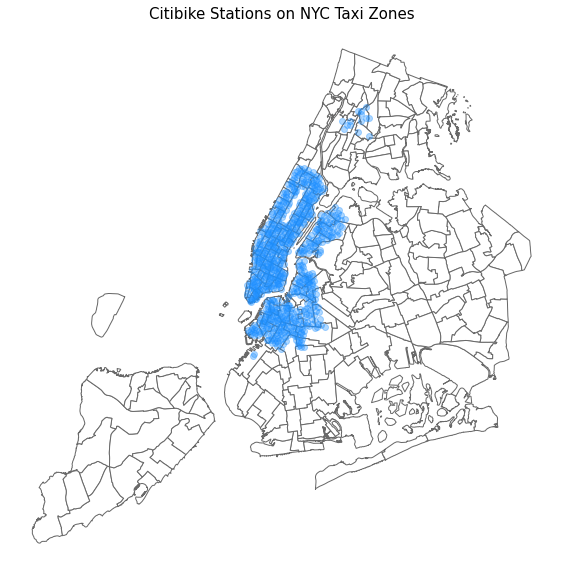

In [47]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)

taxi.plot(ax=ax, color='white', edgecolor='dimgray')

stations_within.plot(ax=ax, color='dodgerblue', alpha=0.35)

ax.set_title('Citibike Stations on NYC Taxi Zones', fontsize=15)
ax.axis('off');

In [48]:
# This spatial will return the polygons that contain points
# The basic question answered here is "which taxi zones have citibike stations?"
zones_with_stations = gpd.sjoin(taxi, citi_gdf, op='contains')
zones_with_stations.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,index_right,end station name,end station longitude,end station latitude
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",457,Avenue D & E 3 St,-73.977932,40.720828
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",61,E 2 St & Avenue C,-73.980858,40.720874
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",135,E 6 St & Avenue D,-73.976687,40.722281
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",170,E 5 St & Avenue C,-73.979955,40.722992
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",183,Avenue D & E 8 St,-73.975748,40.723684


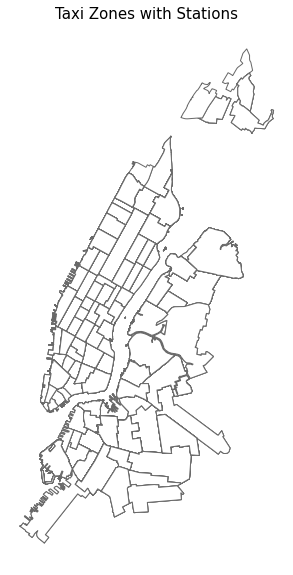

In [49]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
zones_with_stations.plot(ax=ax, color='white', edgecolor='dimgray')
ax.set_title('Taxi Zones with Stations', fontsize=15)
ax.axis('off');

In [53]:
zones = zones_with_stations[['zone', 'end station name']].groupby('zone')['end station name'].count()
zones

zone
Alphabet City                 7
Astoria                      23
Astoria Park                  2
Battery Park                  1
Battery Park City             5
                             ..
Williamsburg (North Side)    16
Williamsburg (South Side)    10
World Trade Center            2
Yorkville East                5
Yorkville West               10
Name: end station name, Length: 97, dtype: int64

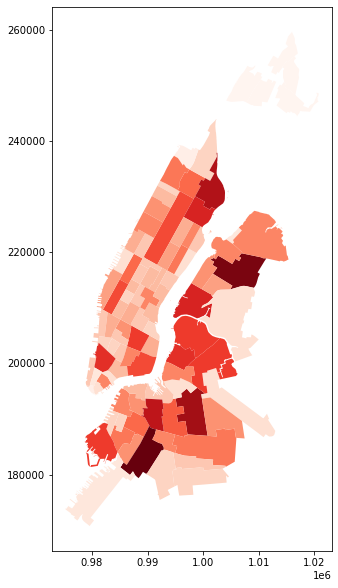

In [60]:
counts = taxi.merge(zones, left_on='zone', right_index=True)
counts.plot(column='end station name', cmap=plt.cm.Reds, figsize=(15, 10))